# Import packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

**Import data**

In [3]:
data = pd.read_csv("Data Sets/ecommerce_data.csv")

**Show first 5 rows of data**

In [4]:
data.head()

date  product_id  city_id  orders
0  2019-12-16        1897       26       2
1  2019-12-16        4850       26       4
2  2019-12-16        2466       26       1
3  2019-12-16         637       26       1
4  2019-12-16        3497       26     184

**Information of data sets**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523684 entries, 0 to 523683
Data columns (total 4 columns):
date          523684 non-null object
product_id    523684 non-null int64
city_id       523684 non-null int64
orders        523684 non-null int64
dtypes: int64(3), object(1)
memory usage: 16.0+ MB


In [6]:
str(data.date.dtypes)

'object'

**Lets bring date column on timestamp**

In [7]:
data["date"] = pd.to_datetime(data["date"])

In [8]:
str(data.date.dtypes)

'datetime64[ns]'

**Lets create some columns for better analysis**

In [9]:
# create year and month column from date column
data["year"] = data["date"].apply(lambda y : y.year)
data["month"] = data["date"].apply(lambda m : m.month)
data["day"] = data["date"].apply(lambda d : d.strftime('%A'))
data["week"] = data["date"].apply(lambda w : w.week)


# EDA

In [10]:
data.head()

date  product_id  city_id  orders  year  month     day  week
0 2019-12-16        1897       26       2  2019     12  Monday    51
1 2019-12-16        4850       26       4  2019     12  Monday    51
2 2019-12-16        2466       26       1  2019     12  Monday    51
3 2019-12-16         637       26       1  2019     12  Monday    51
4 2019-12-16        3497       26     184  2019     12  Monday    51

**Lets set date as a index**

In [11]:
tm_data = data.set_index("date")

In [12]:
tm_data.head()

product_id  city_id  orders  year  month     day  week
date                                                              
2019-12-16        1897       26       2  2019     12  Monday    51
2019-12-16        4850       26       4  2019     12  Monday    51
2019-12-16        2466       26       1  2019     12  Monday    51
2019-12-16         637       26       1  2019     12  Monday    51
2019-12-16        3497       26     184  2019     12  Monday    51

**Lets sort the date for better analysis**

In [13]:
tm_data=tm_data.sort_index(axis = 0) 

**Yearwise analysis**

In [14]:
tm_data.year.unique()

array([2018, 2019], dtype=int64)

**Which year got the most transaction?**

In [15]:
tm_data.year.value_counts()

2019    347558
2018    176126
Name: year, dtype: int64

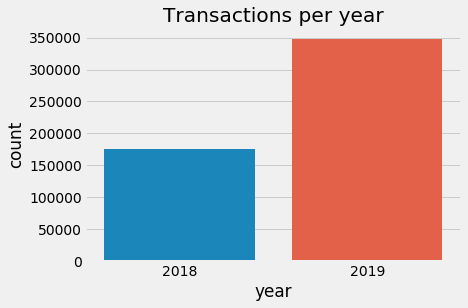

In [16]:
# Visualize 
plt.title("Transactions per year")
sns.countplot(x="year",data=tm_data)

**Which year got the most orders?**

In [17]:
byYear = tm_data.groupby("year").sum()

In [18]:
byYear

product_id  city_id   orders    month     week
year                                                
2018   668955670  2938517  3757845  1736396  7196270
2019  1309955582  5598203  6836957  2350550  9621854

In [19]:
plt.figure(figsize=(12,6))
plt.ylabel("Orders")
byYear["orders"].plot()

Orders are increasing day by day

**Lets do some monthwise analysis**

In [20]:
tm_data.month.value_counts().head()

11    81330
10    72670
12    59458
7     58730
8     55238
Name: month, dtype: int64

In [21]:
byMonth_transaction = tm_data.groupby("month").count()['orders']

In [22]:
plt.title("Transactions per month")
sns.countplot(x='month',data=tm_data)

**Simple plot of order per month**

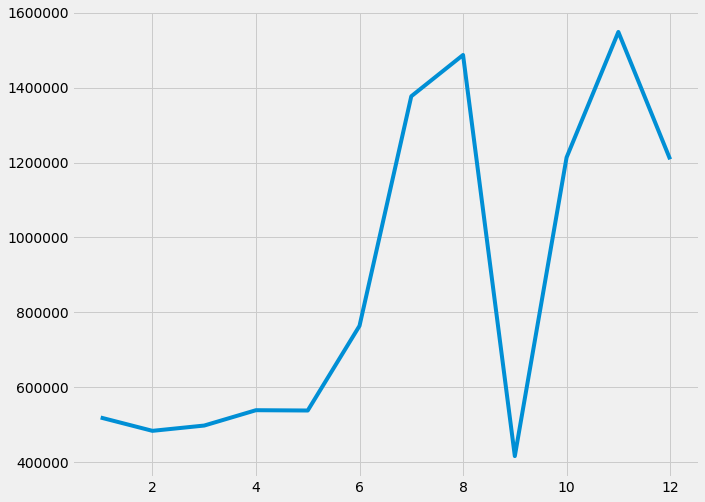

In [23]:
# Plot using seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data=tm_data.groupby("month").sum()["orders"])

**Lets plot for 2018 and 2019 separately**

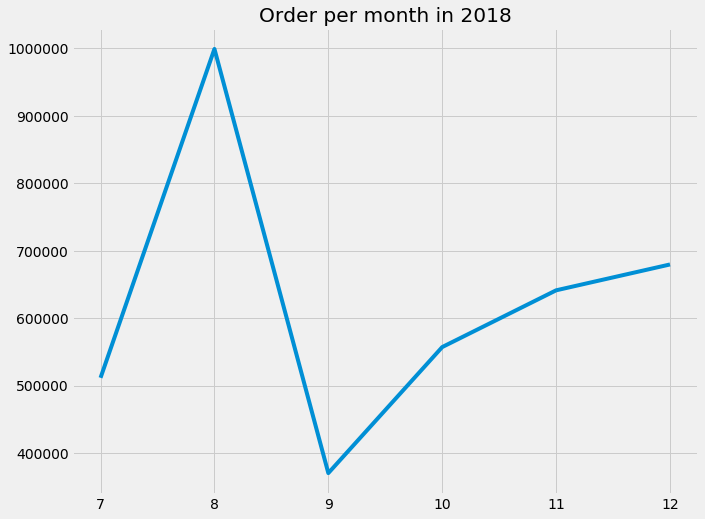

In [24]:
plt.figure(figsize=(10,8))
plt.title("Order per month in 2018")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2018].groupby("month").sum()["orders"])

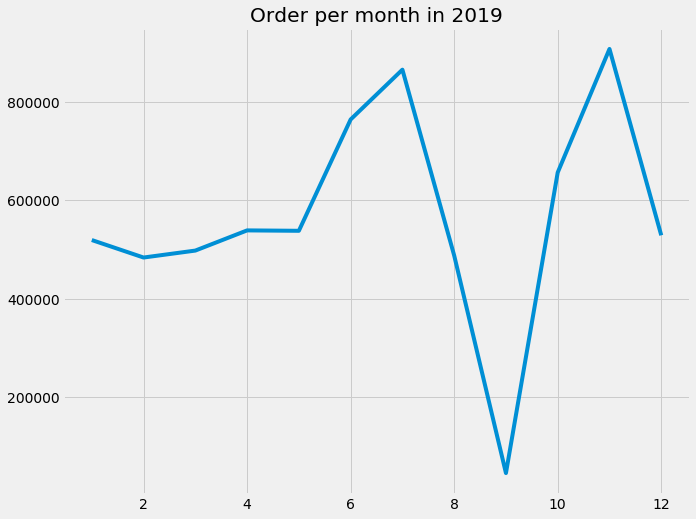

In [25]:
plt.figure(figsize=(10,8))
plt.title("Order per month in 2019")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2019].groupby("month").sum()["orders"])

In [26]:
plt.figure(figsize=(15,8))
plt.title("Avarage Order per month in 2019")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2019].groupby("month").mean()["orders"])

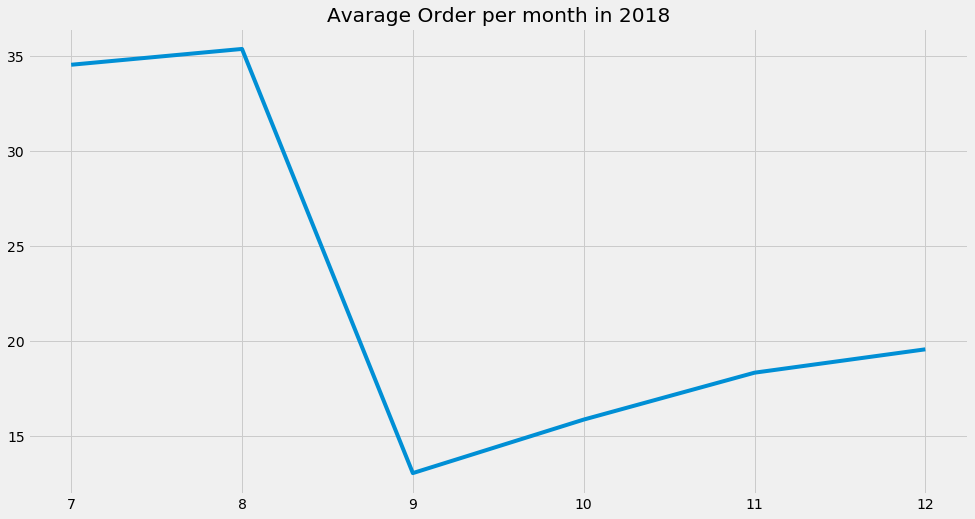

In [27]:
plt.figure(figsize=(15,8))
plt.title("Avarage Order per month in 2018")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2018].groupby("month").mean()["orders"])

**Lets analysis Citywise**

In [28]:
# unique cities
tm_data["city_id"].unique()

array([14, 25, 13,  0,  4, 22, 18, 26,  1,  2, 23, 20, 27,  5, 16,  9, 17,
        7,  6, 29, 11, 28, 10, 24,  3, 21,  8, 30, 19, 12, 15],
      dtype=int64)

**From which cites got the most orders**

In [29]:
byCities = tm_data.groupby("city_id").sum()["orders"]

In [30]:
byCities = pd.DataFrame(byCities)

In [31]:
# Plot using matplotlib
plt.figure(figsize=(15,8))
plt.title("Orders per city")
sns.barplot(x=byCities.index,y="orders",data=byCities)

**Which City got the most transactions?**

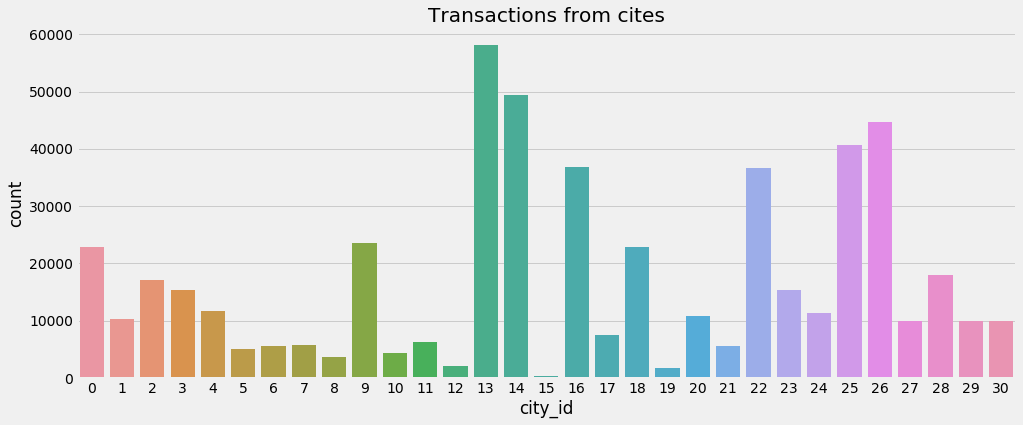

In [32]:
plt.figure(figsize=(15,6))
plt.title("Transactions from cites")
sns.countplot(x="city_id",data=tm_data)

**Lets analysis base on day**

In [33]:
tm_data["day"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [34]:
# Transaction per days
tm_data.groupby("day").count()["orders"]

day
Friday       74468
Monday       77110
Saturday     74342
Sunday       75702
Thursday     72238
Tuesday      74680
Wednesday    75144
Name: orders, dtype: int64

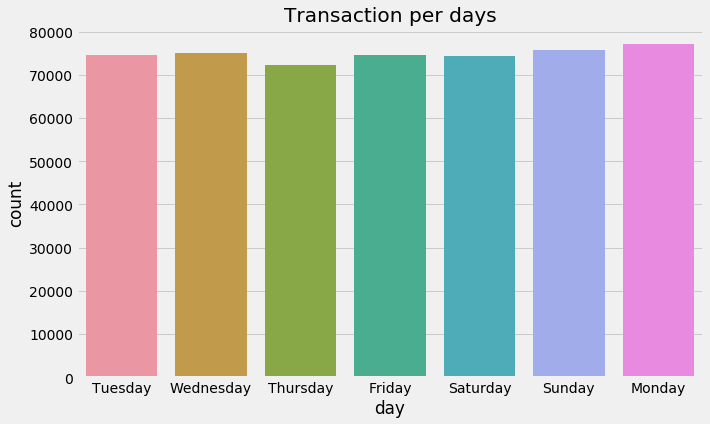

In [35]:
# Visualize transaction
plt.figure(figsize=(10,6))
plt.title("Transaction per days")
sns.countplot(x="day",data=tm_data)

In [36]:
# Orders per day
tm_data.groupby("day").sum()["orders"]

day
Friday       1452471
Monday       1608135
Saturday     1365847
Sunday       1503708
Thursday     1467608
Tuesday      1670317
Wednesday    1526716
Name: orders, dtype: int64

In [37]:
# Visualize Orders per day
plt.figure(figsize=(10,8))
plt.title("Orders per day")
sns.lineplot(data=tm_data.groupby("day").sum()["orders"])

In [38]:
YearMonth_transaction =tm_data.groupby(by=["year","month"]).count()["orders"].unstack()
YearMonth_transaction

month       1        2        3        4        5        6        7        8   \
year                                                                            
2018       NaN      NaN      NaN      NaN      NaN      NaN  14807.0  28238.0   
2019   24314.0  22801.0  26292.0  26954.0  26043.0  38801.0  43923.0  27000.0   

month       9        10       11       12  
year                                       
2018   28339.0  35082.0  34948.0  34712.0  
2019    2714.0  37588.0  46382.0  24746.0

We got NAN value. Beacuse those month data are not here

In [39]:
# Lets fill nan with 0
YearMonth_transaction.fillna(0)

month       1        2        3        4        5        6        7        8   \
year                                                                            
2018       0.0      0.0      0.0      0.0      0.0      0.0  14807.0  28238.0   
2019   24314.0  22801.0  26292.0  26954.0  26043.0  38801.0  43923.0  27000.0   

month       9        10       11       12  
year                                       
2018   28339.0  35082.0  34948.0  34712.0  
2019    2714.0  37588.0  46382.0  24746.0

In [40]:
YearMonth_Orders =tm_data.groupby(by=["year","month"]).count()["orders"].unstack()
YearMonth_Orders

month       1        2        3        4        5        6        7        8   \
year                                                                            
2018       NaN      NaN      NaN      NaN      NaN      NaN  14807.0  28238.0   
2019   24314.0  22801.0  26292.0  26954.0  26043.0  38801.0  43923.0  27000.0   

month       9        10       11       12  
year                                       
2018   28339.0  35082.0  34948.0  34712.0  
2019    2714.0  37588.0  46382.0  24746.0

In [41]:
YearsWeek_transaction = tm_data.groupby(by=["year","week"]).count()["orders"].unstack()
YearsWeek_transaction

week      1       2       3       4       5       6       7       8       9   \
year                                                                           
2018   931.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2019  4696.0  5336.0  5336.0  5595.0  5876.0  5798.0  5614.0  5688.0  5530.0   

week      10  ...       43       44       45       46       47       48  \
year          ...                                                         
2018     NaN  ...   7363.0   7939.0   8367.0   6778.0   8806.0   8909.0   
2019  5811.0  ...  10382.0  10827.0  10983.0  11375.0  10199.0  10910.0   

week       49       50      51      52  
year                                    
2018   8771.0   9370.0  6833.0  6307.0  
2019  10577.0  11040.0  1510.0     NaN  

[2 rows x 52 columns]

In [42]:
YearsWeek_transaction.fillna(0)

week      1       2       3       4       5       6       7       8       9   \
year                                                                           
2018   931.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2019  4696.0  5336.0  5336.0  5595.0  5876.0  5798.0  5614.0  5688.0  5530.0   

week      10  ...       43       44       45       46       47       48  \
year          ...                                                         
2018     0.0  ...   7363.0   7939.0   8367.0   6778.0   8806.0   8909.0   
2019  5811.0  ...  10382.0  10827.0  10983.0  11375.0  10199.0  10910.0   

week       49       50      51      52  
year                                    
2018   8771.0   9370.0  6833.0  6307.0  
2019  10577.0  11040.0  1510.0     0.0  

[2 rows x 52 columns]

In [43]:
MonthDay_transaction = tm_data.groupby(by=["month","day"]).count()["orders"].unstack()
MonthDay_transaction

day    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                
1        3076    3163      3053    3234      3902     3987       3899
2        3251    3205      3247    3413      3272     3213       3200
3        4223    3420      4156    4354      3389     3383       3367
4        3564    4450      3663    3620      3610     4429       3618
5        4438    2809      3481    2763      4449     3618       4485
6        5758    4276      6723    5867      5460     5365       5352
7        7681    9675      7616    7879      7211     9873       8795
8        8124    8249      7962    8250      8234     6804       7615
9        5418    3941      5133    5450      2892     3933       4286
10       8709   11884      8502    9007     10899    11645      12024
11      12883   11675     12360   11451     11238    10916      10807
12       7343   10363      8446   10414      7682     7514       7696

In [44]:
plt.figure(figsize=(10,8))
plt.title("Transactions for day and month")
sns.heatmap(data=MonthDay_transaction)

In [45]:
sns.clustermap(data=MonthDay_transaction)

In [46]:
MonthDay_orders = tm_data.groupby(by=["month","day"]).sum()["orders"].unstack()
MonthDay_orders

day    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                
1       64846   67380     61495   64206     89110    87743      84785
2       69972   71472     65451   75580     66372    68074      67131
3       77625   67060     75070   83162     64558    68245      62450
4       70463   91932     66979   72481     73750    88475      75054
5       88548   65690     69144   55910     89251    76122      93648
6      110387   81117    121583  108379    112309   117521     112996
7      175981  231740    159234  182982    176695   244657     205554
8      190833  197888    170975  184080    197632   334001     211637
9       71583   53791     64443   73034     38273    51936      63605
10     139366  196929    135517  154593    194444   191758     201063
11     243943  270736    216192  236653    199490   196222     185277
12     148924  212400    159764  212648    165724   145563     163516

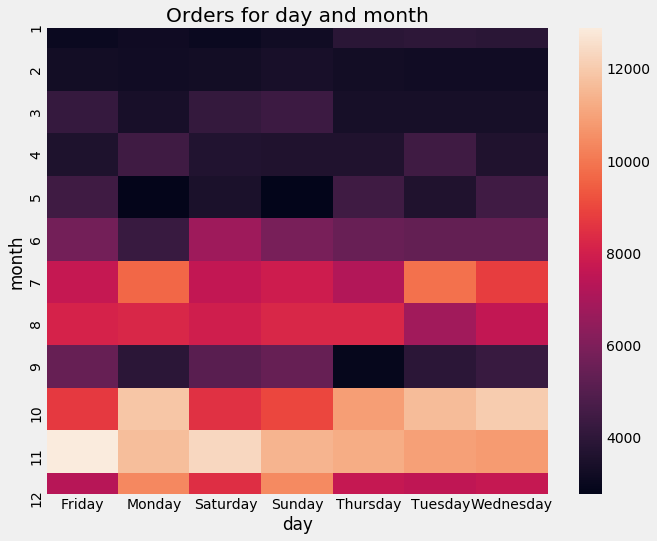

In [47]:
plt.figure(figsize=(10,8))
plt.title("Orders for day and month")
sns.heatmap(data=MonthDay_transaction)

In [48]:
sns.clustermap(MonthDay_orders)

In [49]:
City_Day_transactions = tm_data.groupby(by=["city_id","day"]).count()['orders'].unstack()
City_Day_transactions

day      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
city_id                                                                
0          3173    3416      3192    3331      3144     3307       3309
1          1408    1534      1451    1462      1426     1500       1519
2          2543    2469      2403    2395      2461     2453       2465
3          2159    2288      2153    2179      2133     2175       2218
4          1636    1725      1661    1689      1614     1670       1674
5           697     763       710     827       702      709        713
6           792     836       799     842       745      769        756
7           807     847       822     835       792      810        832
8           541     520       528     529       493      505        524
9          3288    3446      3318    3352      3295     3445       3442
10          601     642       609     640       572      638        620
11          877     945       876     932       907      902        921
12          324     288       318     309       283      283        323
13         8169    8725      8312    8577      7863     8223       8304
14         7292    7098      7114    7107      6778     6924       7032
15           46      43        43      43        42       42         43
16         5269    5343      5378    5301      5050     5218       5268
17         1041    1146      1045    1110      1027     1116       1069
18         3350    3424      3116    3242      3214     3336       3238
19          221     276       242     238       259      270        272
20         1539    1611      1531    1557      1511     1499       1505
21          793     807       829     836       760      826        814
22         5182    5508      5179    5376      5037     5257       5208
23         2121    2284      2146    2273      2134     2210       2195
24         1523    1723      1593    1647      1526     1647       1622
25         5702    5978      5762    5844      5630     5831       5934
26         6635    6247      6413    6253      6364     6279       6463
27         1394    1523      1368    1461      1346     1397       1421
28         2564    2647      2587    2597      2489     2544       2614
29         1382    1529      1454    1483      1310     1456       1417
30         1399    1479      1390    1435      1331     1439       1409

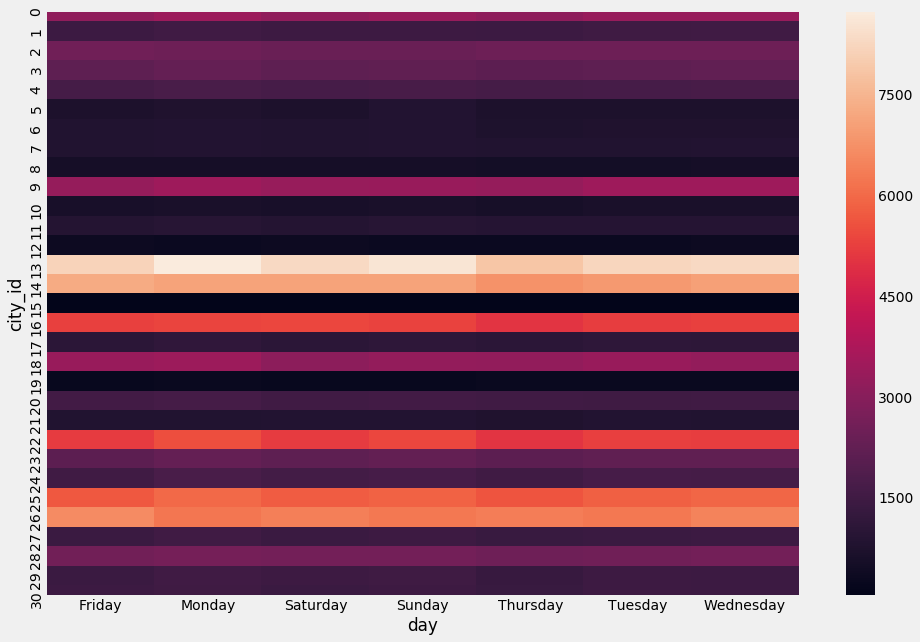

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(data=City_Day_transactions)

In [51]:
sns.clustermap(City_Day_transactions)

In [52]:
City_Day_orders = tm_data.groupby(by=["city_id","day"]).sum()['orders'].unstack()
City_Day_orders

day      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
city_id                                                                
0         22722   27872     22042   25585     24152    26605      25179
1         20084   27631     20907   24972     23050    23214      22943
2         49091   52580     44044   47210     50930    50581      52380
3         47094   46590     47747   45262     43592    41008      42575
4         11250   13746     10880   12437     12498    13110      12622
5          2106    2599      2228    2495      2094     2114       2348
6          4519    6034      4178    5210      4867     4894       4765
7          5893    7241      5599    6201      6597     7010       6070
8         11224    9622      9418    8293     10741     8612      10093
9         23024   26179     22429   23819     23803    24649      25154
10         3649    4689      3533    4645      3701     4123       3997
11         7044    9198      6425    8331      7785     8185       8347
12          855     668       936    1058       578      635        658
13       149490  168755    146025  158203    152111   310063     159880
14       236916  234626    226194  227473    230437   224025     229982
15          426     520       492     549       480      446        483
16       108744  115256    100908  109094    109579   148019     119528
17         5878    7544      5816    6816      6167     6693       6287
18       154838  186282    132587  156094    160935   171771     163231
19         2604    3417      2809    2983      2781     3397       3197
20         8686   10354      7722    8694      8586     8739       8947
21         5933    7003      6230    7354      6231     7044       6518
22        85580  111862     83768  100414     90813    98755      97385
23        11565   14074     10846   12555     12117    12791      13240
24         8933   11684      8935   10552      9178    10609       9781
25       102155  123827     99414  115305    107974   116963     117551
26       329977  342100    302070  337551    324123   302920     340515
27         5267    6799      5033    5974      5695     5727       5820
28        13875   14278     13627   14391     13096    13494      13413
29         3791    4563      4047    4293      3596     4235       4105
30         9258   10542      8958    9895      9321     9886       9722

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(City_Day_orders)

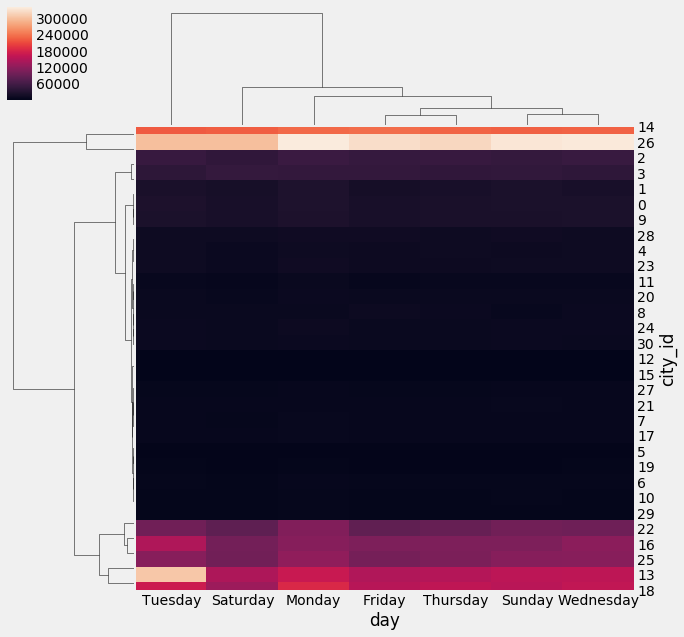

In [54]:
sns.clustermap(City_Day_orders)